# Task 1

---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [65]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [66]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [67]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,"✅ Trip Verified | I had visa issues, and hen..."
1,✅ Trip Verified | Singapore to Heathrow with...
2,✅ Trip Verified | I recently travelled from ...
3,Not Verified | I paid for seats 80 A and B on...
4,"Not Verified | The flight wasn’t that bad, alt..."


In [68]:
df.to_csv("BA_reviews.csv")

Congratulations! Now you have your dataset for this task! The loops above collected 1000 reviews by iterating through the paginated pages on the website. However, if you want to collect more data, try increasing the number of pages!

 The next thing that you should do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

In [69]:
df

,reviews
0,"✅ Trip Verified | I had visa issues, and hen..."
1,✅ Trip Verified | Singapore to Heathrow with...
2,✅ Trip Verified | I recently travelled from ...
3,Not Verified | I paid for seats 80 A and B on...
4,"Not Verified | The flight wasn’t that bad, alt..."
...,...
995,✅ Trip Verified | Calgary to London. Staff we...
996,Not Verified | London Heathrow to Sofia. We c...
997,✅ Trip Verified | Nice to Kuwait via London. ...
998,Not Verified | Buenos Aires to London Heathro...


In [70]:
df['reviews']=df['reviews'].str.split('|', expand=True)[1]

In [71]:
df

,reviews
0,"I had visa issues, and hence, was debarred ..."
1,Singapore to Heathrow with BA. Two choices ...
2,I recently travelled from Munich to London ...
3,I paid for seats 80 A and B on my flight fro...
4,"The flight wasn’t that bad, although the Infl..."
...,...
995,Calgary to London. Staff were not in high st...
996,London Heathrow to Sofia. We checked in onli...
997,Nice to Kuwait via London. My flight from Ni...
998,Buenos Aires to London Heathrow. My wife and...


In [72]:
#Data Cleaning

import re

def clean(text):
# Removing all the special characters and numerical values
    text = re.sub('[^A-Za-z]+', ' ', str(text))
    return text

df['Cleaned Reviews'] = df['reviews'].apply(clean)
df.head()

,reviews,Cleaned Reviews
0,"I had visa issues, and hence, was debarred ...",I had visa issues and hence was debarred from...
1,Singapore to Heathrow with BA. Two choices ...,Singapore to Heathrow with BA Two choices on ...
2,I recently travelled from Munich to London ...,I recently travelled from Munich to London wi...
3,I paid for seats 80 A and B on my flight fro...,I paid for seats A and B on my flight from He...
4,"The flight wasn’t that bad, although the Infl...",The flight wasn t that bad although the Infli...


In [73]:
df.to_csv("BA_reviews_cleaned.csv")

In [74]:
# !pip install nltk

In [75]:
#Natural Language Processing

import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk import pos_tag
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('wordnet')
from nltk.corpus import wordnet


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sohan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sohan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\sohan\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [76]:
nltk.download('omw-1.4')
nltk.download('punkt_tab')
nltk.download('averaged_perceptron_tagger')
nltk.download('averaged_perceptron_tagger_eng')

pos_dict = {'J':wordnet.ADJ, 'V':wordnet.VERB, 'N':wordnet.NOUN, 'R':wordnet.ADV}
def token_stop_pos(text):
    tags = pos_tag(word_tokenize(text))

    newlist = []
    for word, tag in tags:
        if word.lower() not in set(stopwords.words('english')):
          newlist.append(tuple([word, pos_dict.get(tag[0])]))

    return newlist 

df['POS tagged'] = df['Cleaned Reviews'].apply(token_stop_pos)
df.head()

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\sohan\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\sohan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\sohan\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     C:\Users\sohan\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


,reviews,Cleaned Reviews,POS tagged
0,"I had visa issues, and hence, was debarred ...",I had visa issues and hence was debarred from...,"[(visa, v), (issues, n), (hence, n), (debarred..."
1,Singapore to Heathrow with BA. Two choices ...,Singapore to Heathrow with BA Two choices on ...,"[(Singapore, n), (Heathrow, v), (BA, n), (Two,..."
2,I recently travelled from Munich to London ...,I recently travelled from Munich to London wi...,"[(recently, r), (travelled, v), (Munich, n), (..."
3,I paid for seats 80 A and B on my flight fro...,I paid for seats A and B on my flight from He...,"[(paid, v), (seats, n), (B, n), (flight, n), (..."
4,"The flight wasn’t that bad, although the Infl...",The flight wasn t that bad although the Infli...,"[(flight, n), (bad, a), (although, None), (Inf..."


In [77]:
df.to_csv("BA_reviews_POS.csv")

In [78]:
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
def lemmatize(pos_data):
    lemma_rew = " "
    for word, pos in pos_data:
     if not pos:
        lemma = word
        lemma_rew = lemma_rew + " " + lemma
     else:
        lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
        lemma_rew = lemma_rew + " " + lemma
    return lemma_rew

df['G'] = df['POS tagged'].apply(lemmatize)
df.head()

,reviews,Cleaned Reviews,POS tagged,G
0,"I had visa issues, and hence, was debarred ...",I had visa issues and hence was debarred from...,"[(visa, v), (issues, n), (hence, n), (debarred...",visa issue hence debar fly ground staff Mumb...
1,Singapore to Heathrow with BA. Two choices ...,Singapore to Heathrow with BA Two choices on ...,"[(Singapore, n), (Heathrow, v), (BA, n), (Two,...",Singapore Heathrow BA Two choice route econo...
2,I recently travelled from Munich to London ...,I recently travelled from Munich to London wi...,"[(recently, r), (travelled, v), (Munich, n), (...",recently travel Munich London British Airway...
3,I paid for seats 80 A and B on my flight fro...,I paid for seats A and B on my flight from He...,"[(paid, v), (seats, n), (B, n), (flight, n), (...",pay seat B flight Heathrow Boston pay premiu...
4,"The flight wasn’t that bad, although the Infl...",The flight wasn t that bad although the Infli...,"[(flight, n), (bad, a), (although, None), (Inf...",flight bad although Inflight entertainment g...


In [79]:
df[['reviews','G']]

,reviews,G
0,"I had visa issues, and hence, was debarred ...",visa issue hence debar fly ground staff Mumb...
1,Singapore to Heathrow with BA. Two choices ...,Singapore Heathrow BA Two choice route econo...
2,I recently travelled from Munich to London ...,recently travel Munich London British Airway...
3,I paid for seats 80 A and B on my flight fro...,pay seat B flight Heathrow Boston pay premiu...
4,"The flight wasn’t that bad, although the Infl...",flight bad although Inflight entertainment g...
...,...,...
995,Calgary to London. Staff were not in high st...,Calgary London Staff high standard Looked ru...
996,London Heathrow to Sofia. We checked in onli...,London Heathrow Sofia check online go straig...
997,Nice to Kuwait via London. My flight from Ni...,Nice Kuwait via London flight Nice delay pla...
998,Buenos Aires to London Heathrow. My wife and...,Buenos Aires London Heathrow wife fly back A...


In [80]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
#from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

def vadersentimentanalysis(review):
    vs = analyzer.polarity_scores(review)
    return vs['compound']

df['Sentiment'] = df['G'].apply(vadersentimentanalysis)

def vader_analysis(compound):
    if compound >= 0.5:
        return 'Positive'
    elif compound < 0 :
        return 'Negative'
    else:
        return 'Neutral'
    
df['Analysis'] = df['Sentiment'].apply(vader_analysis)
df.head()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\sohan\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


,reviews,Cleaned Reviews,POS tagged,G,Sentiment,Analysis
0,"I had visa issues, and hence, was debarred ...",I had visa issues and hence was debarred from...,"[(visa, v), (issues, n), (hence, n), (debarred...",visa issue hence debar fly ground staff Mumb...,-0.0772,Negative
1,Singapore to Heathrow with BA. Two choices ...,Singapore to Heathrow with BA Two choices on ...,"[(Singapore, n), (Heathrow, v), (BA, n), (Two,...",Singapore Heathrow BA Two choice route econo...,0.9821,Positive
2,I recently travelled from Munich to London ...,I recently travelled from Munich to London wi...,"[(recently, r), (travelled, v), (Munich, n), (...",recently travel Munich London British Airway...,-0.8268,Negative
3,I paid for seats 80 A and B on my flight fro...,I paid for seats A and B on my flight from He...,"[(paid, v), (seats, n), (B, n), (flight, n), (...",pay seat B flight Heathrow Boston pay premiu...,-0.6249,Negative
4,"The flight wasn’t that bad, although the Infl...",The flight wasn t that bad although the Infli...,"[(flight, n), (bad, a), (although, None), (Inf...",flight bad although Inflight entertainment g...,0.8555,Positive


In [81]:
df.to_csv("BA_reviews_Sentiment_Analysis.csv")

In [82]:
vader_counts = df['Analysis'].value_counts()
vader_counts

Analysis
Positive    460
Negative    431
Neutral     109
Name: count, dtype: int64

In [83]:
type(vader_counts)


pandas.core.series.Series

In [84]:
# !pip install matplotlib

([<matplotlib.patches.Wedge at 0x1a730424380>,
 [Text(0.13786652831108215, 1.0913261750601648, 'Positive'),
  Text(-0.4963079590628943, -0.9816712330362058, 'Negative'),
  Text(1.271619409691705, -0.45330351520291584, 'Neutral')],
 [Text(0.07519992453331752, 0.5952688227600899, '46.0%'),
  Text(-0.27071343221612415, -0.5354570362015667, '43.1%'),
  Text(0.8006492579540364, -0.28541332438702105, '10.9%')])

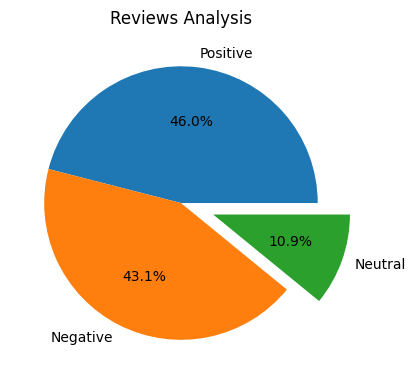

In [85]:
#Data Visualization

import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(15,7))

plt.subplot(1,3,2)
plt.title("Reviews Analysis")
plt.pie(vader_counts.values, labels = vader_counts.index, explode = (0, 0, 0.25), autopct='%1.1f%%', shadow=False)

In [86]:
df.to_csv("Preprocessed British Airways reviews.csv")

In [87]:
!pip install wordcloud


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


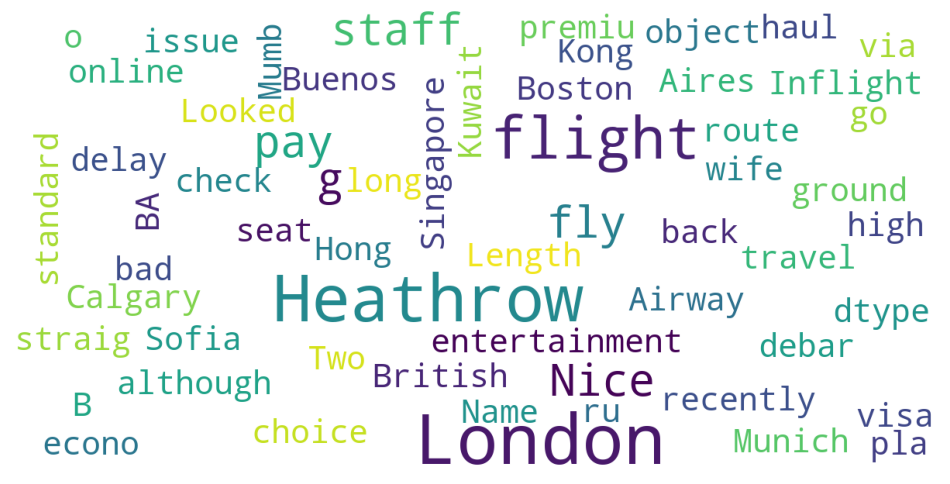

In [88]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

def show_wordcloud(data):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=100,
        max_font_size=30,
        scale=3,
        random_state=1)

    wordcloud=wordcloud.generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(df.G)